# Obtaining OAuth2 access

Installing requests and importing the required modules.

In [1]:
!pip install requests

In [68]:
import json
import requests
import base64
import pandas as pd

Saving the credentials to variables to access them more easily. These credentials are unique to each Spotify user.

In [5]:
client_id = '30daab6eacde4b04901c9c6929ed49ea'
client_secret = 'cac7e435e9ca4af39aa9e9bd48beae1d'

Encode the client secret using base 64 encoder online or import base64:

In [6]:
encoded_client_creds = 'MzBkYWFiNmVhY2RlNGIwNDkwMWM5YzY5MjllZDQ5ZWE6Y2FjN2U0MzVlOWNhNGFmMzlhYTllOWJkNDhiZWFlMWQ='

In [7]:
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))

Obtain the code that pops up in the URL bar when running the get_code.py Flask file. Enter your client ID and client secret, click the top submit button, not the bottom one. It will redirect to the same page but with the code in the url bar.

In [87]:
code = 'AQC1gOlyEtTosL10ZARIlvfxd8vIQOPyYZLqd1IbQF2XI5-3AE6dB2lvirBOAmtsZ0UMNYT7HZpgj-vC49o7WEOOSXUoyn3CwBNeIOhav0Ih4yJOe4jSwaeF1AnS5-hbrdyMCYrsy_dd9CZBS6yLnascHODopixDVtZRbApKhwf71YiXjlg6mGqOTYfux0h3JVNwkHdBGCaT7HNsoe1_RVU4QtlfxcZ6pTCAOHx6Sv3HylIvFqoc6ejR-hKsHQ'

Creating variables and dicts to hold request info

In [88]:
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'authorization_code',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

Sending POST request to obtain token and saving to token_response_data

In [89]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()

{'access_token': 'BQAqu7mfGa7bToo9Gg8nXiZJBzSRkgh3kH6rzvHEcPJOLVUGOJHeNKTEvOFVpxXBZDBJuXw3Dn_Qa116iTkwGnnGpdMlNw2fnGPzuZ0EhfcFn7f11WoSmtFskQWZWPcxO4mPwigfBlrHzr90fT717xUY1lIXTvToSiD6qMTUFXecv4XdZ5LKD7E2WjQewGS0WDFZKHJM8PRFCoa-S8sSy9dItv1DGzkdZ4IoPbCm9SBfdTnabc3L2bMNuv3JDWTEpFtOMdsC5j2yOg', 'token_type': 'Bearer', 'expires_in': 3600, 'refresh_token': 'AQAtBV12YsQRYe9YzvViWzmLCQHm1myXgvNWTteGtJ-Y51-GvNIwa2xrZOr-Tn6_aGOh1yVbHoGqaHGSi4e-pCq7un_040DcsOIXqG1djNDdVQMRCdZZ0Vpz9lrO36ge6OY', 'scope': 'user-library-read playlist-modify-private playlist-modify-public'}


Verifying that the access token can be accessed

In [90]:
token_response_data['access_token']

'BQAqu7mfGa7bToo9Gg8nXiZJBzSRkgh3kH6rzvHEcPJOLVUGOJHeNKTEvOFVpxXBZDBJuXw3Dn_Qa116iTkwGnnGpdMlNw2fnGPzuZ0EhfcFn7f11WoSmtFskQWZWPcxO4mPwigfBlrHzr90fT717xUY1lIXTvToSiD6qMTUFXecv4XdZ5LKD7E2WjQewGS0WDFZKHJM8PRFCoa-S8sSy9dItv1DGzkdZ4IoPbCm9SBfdTnabc3L2bMNuv3JDWTEpFtOMdsC5j2yOg'

Creating variables and dicts to hold playlist creation request info. Parameters can be found here https://developer.spotify.com/documentation/web-api/reference/create-playlist

In [15]:
user_id = 'jg5cbemqytn2p6s1xmvs87o8y' # substitute username as a string here
playlist_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"
method = 'POST'
token_headers = {
    "Authorization": f"Bearer {token_response_data['access_token']}",
    "Content-Type": 'application/json'
}
token_data = { # stuff about the playlist
    "name": "super swag music", 
    "description": "Test playlist description", 
    "public": False
}

Running this cell creates a new playlist!

In [16]:
r = requests.post(playlist_url, data=json.dumps(token_data), headers=token_headers)
print(r.json())
playlist_create_response = r.json()

{'collaborative': False, 'description': None, 'external_urls': {'spotify': 'https://open.spotify.com/playlist/3V1QsNqXuKjog9C6NSPnxn'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/playlists/3V1QsNqXuKjog9C6NSPnxn', 'id': '3V1QsNqXuKjog9C6NSPnxn', 'images': [], 'name': 'super swag music', 'owner': {'display_name': 'lauren sun', 'external_urls': {'spotify': 'https://open.spotify.com/user/jg5cbemqytn2p6s1xmvs87o8y'}, 'href': 'https://api.spotify.com/v1/users/jg5cbemqytn2p6s1xmvs87o8y', 'id': 'jg5cbemqytn2p6s1xmvs87o8y', 'type': 'user', 'uri': 'spotify:user:jg5cbemqytn2p6s1xmvs87o8y'}, 'primary_color': None, 'public': False, 'snapshot_id': 'MSxmMTM4Mjc4YTE0NWZiZWM5NWEyZmVjNDMwZDZjNTBmMjNkNDcxYzcx', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/3V1QsNqXuKjog9C6NSPnxn/tracks', 'items': [], 'limit': 100, 'next': None, 'offset': 0, 'previous': None, 'total': 0}, 'type': 'playlist', 'uri': 'spotify:playlist:3V1QsNqXuKjog9C6NSPnxn'}


# Adding Songs

Required parameters can be found here: https://developer.spotify.com/documentation/web-api/reference/add-tracks-to-playlist. Track ID is the string of characters obtained from right clicking a song > Share > Copy Song Link after "track/" and before "?si="

In [41]:
playlist_id = playlist_create_response['id']
track_url = 'https://api.spotify.com/v1/playlists/' + playlist_id + '/tracks'

headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}
add_data = {
    'uris': ['spotify:track:12O9MpMmewwdDkxZC9uqvS'],
    "position": 0
}

Send a request to add "Strange Weather" by Slaughter Beach, Dog to this playlist

In [42]:
r = requests.post(track_url, data=json.dumps(add_data), headers=headers)
print(r.json())
add_track_response = r.json()

{'snapshot_id': 'NCxjNmY5Njk4NDU1ZmE2MTk2YzZkMDkxY2YxNDQ0NTY4Yzg1ZTgwYzE0'}


# Retrieving Saved Songs

From https://developer.spotify.com/documentation/web-api/reference/get-users-saved-tracks. Make sure that in the get_code.py file, there's a user-library-read in the scope line.

In [91]:
method = 'GET'
library_url = 'https://api.spotify.com/v1/me/tracks'
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}"
}


Import songs 1 at a time into pandas df (API only retrieves 50 songs at once)

In [92]:
saved_songs = requests.get(library_url, {
            "limit": 50
        },
        headers=headers)

In [95]:
saved_songs.json().keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [96]:
saved_songs = []
for i in range(37):
    saved_songs += requests.get(library_url, {
            "limit": 50,
            "offset": i*50
        },
        headers=headers).json()['items']

What does one entry look like?

Iterate through each entry in `songs['items']` which really has all the song info. That song has `track` column, and that column's `id` column contains the id. 

In [99]:
saved_song_ids = [song['track']['id'] for song in saved_songs if not isinstance(song, float)]

In [101]:
file_path = 'saved_song_ids.txt'

# save to file so i don't have to keep querying it
with open(file_path, 'w') as f:
    json.dump(saved_song_ids, f)

   # Retrieving Songs from Playlist

proof of concept:

In [19]:
playlist_id = '2aNrvgAphphQT8a9AsIjc2'
playlist_url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
r = requests.get(playlist_url, {
        'limit': 50 },
        headers=headers)

In [27]:
print(len(r.json()['items']))
print(type(r.json()['items'][0]))

50
<class 'dict'>


Each song is stored as a dictionary. Now get all 200+ songs from the i95 playlist

In [30]:
i95songs = []
for i in range (5):
    i95songs += requests.get(playlist_url, {
        'limit': 50,
        'offset': i*50
    }, headers=headers).json()['items']
    

In [32]:
len(i95songs)

227

All 227 songs saved as dictionaries in the i95 songs list. Isolate their IDs

In [40]:
i95song_ids = [song['track']['id'] for song in i95songs if not isinstance(song, float)]

In [77]:
file_path = 'i95song_ids.txt'

# save to file so i don't have to keep querying it
with open(file_path, 'w') as f:
    json.dump(i95song_ids, f)

## Get client_credentials access token

Need this b/c requesting data about the songs, not user data

In [102]:
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'client_credentials',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

In [103]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()

{'access_token': 'BQCHy-VFiv7uMtdpoqj9J1h6vNyHPb-tCD0Kjw7amVCzKPH5ckRKyj1uHsIcmX41n3emAHtMXNmXL1H6x_PLuzufmvFArJhXD0yvfYQadbrTqSTHEKo', 'token_type': 'Bearer', 'expires_in': 3600}


Write the body of the request, now with the access token that has client_credentials permissions. Can't do the get request without switching to client_credentials

In [104]:
song_url = f"https://api.spotify.com/v1/audio-features/{id}"
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}

In [105]:
r = requests.get(f"https://api.spotify.com/v1/audio-features/2Kj95VOpBEJzBFNzwirZwU", headers=headers).json()
r

{'danceability': 0.387,
 'energy': 0.497,
 'key': 11,
 'loudness': -7.124,
 'mode': 1,
 'speechiness': 0.0388,
 'acousticness': 0.115,
 'instrumentalness': 2.83e-05,
 'liveness': 0.11,
 'valence': 0.227,
 'tempo': 167.66,
 'type': 'audio_features',
 'id': '2Kj95VOpBEJzBFNzwirZwU',
 'uri': 'spotify:track:2Kj95VOpBEJzBFNzwirZwU',
 'track_href': 'https://api.spotify.com/v1/tracks/2Kj95VOpBEJzBFNzwirZwU',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Kj95VOpBEJzBFNzwirZwU',
 'duration_ms': 196250,
 'time_signature': 4}

Format song ID's to feed into format needed for Several Track Audio Features API request

In [122]:
# format song ids into comma separated strings
saved_idstrings = []
for i in range(18): # batches of 100 songs
    idstring = ""
    for j in range(0+i*100, i*100+100):
        idstring+=saved_song_ids[j] + ","
    idstring = idstring[:len(idstring)-1]
    # trim off last comma
    saved_idstrings.append(idstring)
# make last batch; hard-code
idstring = ""
for j in range(1800, 1808):
    idstring+=saved_song_ids[j] + ","
idstring = idstring[:len(idstring)-1]
saved_idstrings.append(idstring)

In [110]:
# format song ids into comma separated strings
i95_idstrings = []
for i in range(2): # batches of 100 songs
    idstring = ""
    for j in range(0+i*100, i*100+100):
        idstring+=i95song_ids[j] + ","
    idstring = idstring[:len(idstring)-1]
    # trim off last comma
    i95_idstrings.append(idstring)
# make last batch; hard-code
idstring = ""
for j in range(200, 227):
    idstring+=i95song_ids[j] + ","
idstring = idstring[:len(idstring)-1]
i95_idstrings.append(idstring)

got the first 200 songs from the playlist

In [112]:
print(len(saved_idstrings), len(i95_idstrings))

18 3


Proof of concept: try just 1st batch

In [113]:
features_url = "https://api.spotify.com/v1/audio-features"
r = requests.get(features_url, {
        'ids': saved_idstrings[0]},
        headers=headers).json()

In [114]:
print(r.keys())
print(r['audio_features'][0])
print(len(r['audio_features']))

dict_keys(['audio_features'])
{'danceability': 0.946, 'energy': 0.289, 'key': 11, 'loudness': -9.413, 'mode': 1, 'speechiness': 0.0584, 'acousticness': 0.152, 'instrumentalness': 2e-05, 'liveness': 0.234, 'valence': 0.816, 'tempo': 102.073, 'type': 'audio_features', 'id': '4KqBoq7MoDJeVsvUHTjXCM', 'uri': 'spotify:track:4KqBoq7MoDJeVsvUHTjXCM', 'track_href': 'https://api.spotify.com/v1/tracks/4KqBoq7MoDJeVsvUHTjXCM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4KqBoq7MoDJeVsvUHTjXCM', 'duration_ms': 129627, 'time_signature': 4}
100


Do all saved songs

In [125]:
saved_feature_dicts = []
for i in range(19):
    saved_feature_dicts += requests.get(features_url, {
        'ids': saved_idstrings[i]},
        headers=headers).json()['audio_features']

In [126]:
len(saved_feature_dicts)

1808

In [127]:
file_path = 'saved_features.txt'

# save to file so i don't have to keep querying it
with open(file_path, 'w') as f:
    json.dump(saved_feature_dicts, f)

Do all i95 songs

In [118]:
i95_feature_dicts = []
for i in range(3):
    i95_feature_dicts += requests.get(features_url, {
        'ids': i95_idstrings[i]},
        headers=headers).json()['audio_features']

In [119]:
len(i95_feature_dicts)

227

In [121]:
file_path = 'i95_features.txt'

# save to file so i don't have to keep querying it
with open(file_path, 'w') as f:
    json.dump(i95_feature_dicts, f)

# Analyze audio features of all my songs vs songs in i95

In [129]:
saved_af = pd.DataFrame(saved_feature_dicts)
saved_af.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.946,0.289,11,-9.413,1,0.0584,0.152,0.000020,0.234,0.816,102.073,audio_features,4KqBoq7MoDJeVsvUHTjXCM,spotify:track:4KqBoq7MoDJeVsvUHTjXCM,https://api.spotify.com/v1/tracks/4KqBoq7MoDJe...,https://api.spotify.com/v1/audio-analysis/4KqB...,129627,4
1,0.456,0.660,9,-9.254,1,0.0377,0.383,0.660000,0.113,0.527,113.670,audio_features,5lDoRJ2vW6G4YXeUciQd3R,spotify:track:5lDoRJ2vW6G4YXeUciQd3R,https://api.spotify.com/v1/tracks/5lDoRJ2vW6G4...,https://api.spotify.com/v1/audio-analysis/5lDo...,227587,4
2,0.559,0.661,7,-8.769,1,0.0323,0.578,0.000000,0.376,0.862,162.935,audio_features,2gzY74wkSgo1ts1IZbjxfT,spotify:track:2gzY74wkSgo1ts1IZbjxfT,https://api.spotify.com/v1/tracks/2gzY74wkSgo1...,https://api.spotify.com/v1/audio-analysis/2gzY...,170640,4
3,0.573,0.388,7,-13.922,1,0.0269,0.218,0.001270,0.110,0.806,105.825,audio_features,7w1OJlqxiRxnC4ct8yNN1n,spotify:track:7w1OJlqxiRxnC4ct8yNN1n,https://api.spotify.com/v1/tracks/7w1OJlqxiRxn...,https://api.spotify.com/v1/audio-analysis/7w1O...,177867,4
4,0.377,0.666,2,-8.066,1,0.0314,0.158,0.000621,0.339,0.637,122.146,audio_features,1mpv6hIbfG75txI9zJGcf4,spotify:track:1mpv6hIbfG75txI9zJGcf4,https://api.spotify.com/v1/tracks/1mpv6hIbfG75...,https://api.spotify.com/v1/audio-analysis/1mpv...,210467,4


In [130]:
i95_af = pd.DataFrame(i95_feature_dicts)
i95_af.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.593,0.807,2,-7.995,1,0.0371,0.000125,0.000210,0.0914,0.521,116.077,audio_features,1AEiKr56njftNDp67QCnHH,spotify:track:1AEiKr56njftNDp67QCnHH,https://api.spotify.com/v1/tracks/1AEiKr56njft...,https://api.spotify.com/v1/audio-analysis/1AEi...,216787,4
1,0.565,0.718,10,-8.428,1,0.0281,0.002270,0.000086,0.0812,0.509,85.433,audio_features,7yIoiP1spudd0cuRL6NB9E,spotify:track:7yIoiP1spudd0cuRL6NB9E,https://api.spotify.com/v1/tracks/7yIoiP1spudd...,https://api.spotify.com/v1/audio-analysis/7yIo...,244360,4
2,0.302,0.705,9,-7.061,1,0.0297,0.091300,0.022700,0.0976,0.865,173.289,audio_features,4zdEcOj9IEAE1cWG7zzYxB,spotify:track:4zdEcOj9IEAE1cWG7zzYxB,https://api.spotify.com/v1/tracks/4zdEcOj9IEAE...,https://api.spotify.com/v1/audio-analysis/4zdE...,229843,4
3,0.408,0.666,7,-6.286,1,0.0578,0.000455,0.862000,0.0889,0.666,82.523,audio_features,0OM9ri37LIbPc9hffwsyb1,spotify:track:0OM9ri37LIbPc9hffwsyb1,https://api.spotify.com/v1/tracks/0OM9ri37LIbP...,https://api.spotify.com/v1/audio-analysis/0OM9...,224333,4
4,0.620,0.593,7,-10.985,1,0.0281,0.294000,0.000000,0.0749,0.833,109.044,audio_features,4SPi5Pl7aAtauFsH9Lk5LB,spotify:track:4SPi5Pl7aAtauFsH9Lk5LB,https://api.spotify.com/v1/tracks/4SPi5Pl7aAta...,https://api.spotify.com/v1/audio-analysis/4SPi...,234907,4


In [131]:
import matplotlib.pyplot as plt

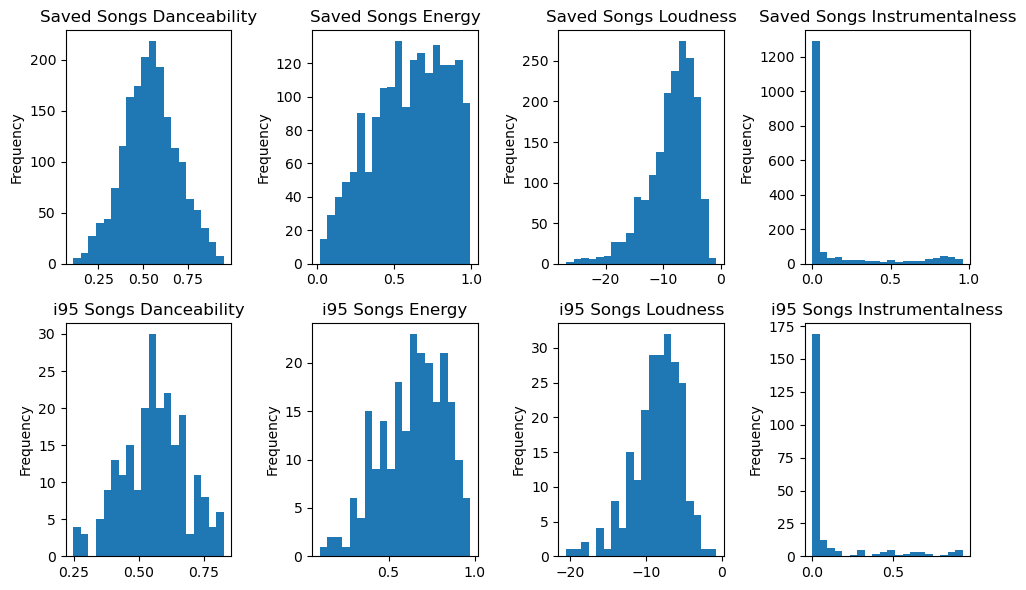

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
saved_af['danceability'].plot.hist(ax=axes[0, 0], bins=20)
axes[0,0].set_title('Saved Songs Danceability')
saved_af['energy'].plot.hist(ax=axes[0, 1], bins=20)
axes[0,1].set_title('Saved Songs Energy')
saved_af['loudness'].plot.hist(ax=axes[0, 2], bins=20)
axes[0, 2].set_title('Saved Songs Loudness')
saved_af['instrumentalness'].plot.hist(ax=axes[0, 3], bins=20)
axes[0, 3].set_title('Saved Songs Instrumentalness')

i95_af['danceability'].plot.hist(ax=axes[1, 0], bins=20)
axes[1,0].set_title('i95 Songs Danceability')
i95_af['energy'].plot.hist(ax=axes[1, 1], bins=20)
axes[1,1].set_title('i95 Songs Energy')
i95_af['loudness'].plot.hist(ax=axes[1, 2], bins=20)
axes[1, 2].set_title('i95 Songs Loudness')
i95_af['instrumentalness'].plot.hist(ax=axes[1, 3], bins=20)
axes[1, 3].set_title('i95 Songs Instrumentalness')

plt.tight_layout()